In [1]:
import pandas as pd 
import numpy as np 
import os 
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

# from nhlpy import NHLClient


In [3]:
# Function to get game logs for a specific season
def get_game_log(player_id, season):
    url = f"https://api-web.nhle.com/v1/player/{player_id}/game-log/{season}/2"
    response = requests.get(url)
    return response.json()




In [9]:
# Set variables
season = 20232024
player_id = 8471214

# Get the Game logs
game_logs = get_game_log(player_id, season)

pprint(game_logs)

{'gameLog': [{'assists': 0,
              'commonName': {'default': 'Capitals'},
              'gameDate': '2024-04-16',
              'gameId': 2023021299,
              'gameWinningGoals': 0,
              'goals': 1,
              'homeRoadFlag': 'R',
              'opponentAbbrev': 'PHI',
              'opponentCommonName': {'default': 'Flyers'},
              'otGoals': 0,
              'pim': 0,
              'plusMinus': 1,
              'points': 1,
              'powerPlayGoals': 0,
              'powerPlayPoints': 0,
              'shifts': 22,
              'shorthandedGoals': 0,
              'shorthandedPoints': 0,
              'shots': 1,
              'teamAbbrev': 'WSH',
              'toi': '14:55'},
             {'assists': 0,
              'commonName': {'default': 'Capitals'},
              'gameDate': '2024-04-15',
              'gameId': 2023021291,
              'gameWinningGoals': 0,
              'goals': 0,
              'homeRoadFlag': 'H',
              'op

In [ ]:
# Create a DataFrame from the game log data
game_log_df = pd.DataFrame(game_logs)

game_log_df.head()


In [12]:
# Function to get game logs for a specific season
def get_goalie_game_log(player_id, season):
    url = f"https://api-web.nhle.com/v1/goalie-stats-leaders/current?categories=wins&limit=5"
    response = requests.get(url)
    return response.json()

In [14]:
teams = [
#     
    "BOS",  # Boston Bruins
      #"ANA",  # Anaheim Ducks
    "BUF",  # Buffalo Sabres
    "CAR",  # Carolina Hurricanes
    "CBJ",  # Columbus Blue Jackets
    "CGY",  # Calgary Flames
    "CHI",  # Chicago Blackhawks
    "COL",  # Colorado Avalanche
    "DAL",  # Dallas Stars
    "DET",  # Detroit Red Wings
                                    #"EDM",  # Edmonton Oilers
    "FLA",  # Florida Panthers
    "LAK",  # Los Angeles Kings
    "MIN",  # Minnesota Wild
    "MTL",  # Montreal Canadiens
    "NJD",  # New Jersey Devils
    "NSH",  # Nashville Predators
    "NYI",  # New York Islanders
                                    #"NYR",  # New York Rangers
    "OTT",  # Ottawa Senators
    "PHI",  # Philadelphia Flyers
    "PIT",  # Pittsburgh Penguins
    "SEA",  # Seattle Kraken
    "SJS",  # San Jose Sharks
    "STL",  # St. Louis Blues
    "TBL",  # Tampa Bay Lightning
    "TOR",  # Toronto Maple Leafs
    "UTA",  # Utah Hockey Club
    "VAN",  # Vancouver Canucks
    "VGK",  # Vegas Golden Knights
    "WPG",  # Winnipeg Jets
    "WSH"   # Washington Capitals
#     "ARI"   # Arizona Coyotes
#     "ATL"   # Atlanta Thrashers 
#     "HFD"   # Hartford
#     "PHX"   # Pheonix
#     "QUE"   # Quebec
#     "WIN"   # Winnepeg Jets - Old
    ]

seasons = [

    "20242025"
]

# Function to get player data from the NHL API
def get_player_data(team, season):
    url = f"https://api-web.nhle.com/v1/roster/{team}/{season}"
    response = requests.get(url)

    # Check if the response is valid JSON
    try:
        return response.json()
    except requests.JSONDecodeError:
        print(f"Error decoding JSON for team {team} in season {season}")
        return {}

# Initialize a dictionary to store player IDs
player_ids = {}

# Loop through each season in the seasons list
for season in seasons:
    player_ids[season] = {}

    # Loop through each team
    for team in teams:
        try:
            # Get the player data for the team and season
            player_data = get_player_data(team, season)
        
            # Initialize dictionaries for defencemen, forwards, and goalies
            player_ids[season][team] = {
                #'defencemen': [],
                #'forwards': [],
                'goalies': []
            }
        
            # # Extract player IDs from defencemen
            # if 'defensemen' in player_data:
            #     for player in player_data['defensemen']:
            #         player_id = player['id']
            #         player_ids[season][team]['defencemen'].append(player_id)
        
            # Extract player IDs from forwards
            # if 'forwards' in player_data:
            #     for player in player_data['forwards']:
            #         player_id = player['id']
            #         player_ids[season][team]['forwards'].append(player_id)
        
            # Extract player IDs from goalies
            if 'goalies' in player_data:
                for player in player_data['goalies']:
                    player_id = player['id']
                    player_ids[season][team]['goalies'].append(player_id)
    
        except KeyError:
            print(f"Team {team} not found for season {season}. Skipping...")
            continue

#Print the player IDs
pprint(player_ids)

{'20242025': {'BOS': {'goalies': [8476914, 8480280]},
              'BUF': {'goalies': [8480045, 8473503]},
              'CAR': {'goalies': [8475883, 8481611]},
              'CBJ': {'goalies': [8478007, 8480193]},
              'CGY': {'goalies': [8478435, 8481692]},
              'CHI': {'goalies': [8481519, 8482821]},
              'COL': {'goalies': [8478406, 8475809]},
              'DAL': {'goalies': [8479193, 8479979]},
              'DET': {'goalies': [8479312, 8475852, 8475660]},
              'FLA': {'goalies': [8475683, 8477970]},
              'LAK': {'goalies': [8475311, 8479496]},
              'MIN': {'goalies': [8470594, 8479406]},
              'MTL': {'goalies': [8482487, 8478470]},
              'NJD': {'goalies': [8474596, 8474593]},
              'NSH': {'goalies': [8481020, 8477424]},
              'NYI': {'goalies': [8477405, 8478009, 8473575]},
              'OTT': {'goalies': [8476341, 8482447, 8476999]},
              'PHI': {'goalies': [8481035, 8478905]},
 

In [15]:
# look at an individual goalie's stats
import requests
import pandas as pd

# Function to get game logs for a specific season
def get_game_log(player_id, season):
    url = f"https://api-web.nhle.com/v1/player/{player_id}/game-log/{season}/2"
    response = requests.get(url)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: Unable to fetch data for player_id {player_id} and season {season}")
        return None

# Specify the season and player_id
season = 20242025
player_id = 8476914

# Get the game logs
game_logs = get_game_log(player_id, season)

# Convert the game logs to a DataFrame and print the columns
if game_logs and 'gameLog' in game_logs:
    game_log_data = game_logs['gameLog']
    
    # Create a DataFrame from the game log data
    game_log_df = pd.DataFrame(game_log_data)
    
    # Display the columns of the DataFrame
    print("Columns in the game log DataFrame:")
    print(game_log_df.columns)
else:
    print("No game log data available")

Columns in the game log DataFrame:
Index(['gameId', 'teamAbbrev', 'homeRoadFlag', 'gameDate', 'goals', 'assists',
       'commonName', 'opponentCommonName', 'gamesStarted', 'decision',
       'shotsAgainst', 'goalsAgainst', 'savePctg', 'shutouts',
       'opponentAbbrev', 'pim', 'toi'],
      dtype='object')


In [ ]:
# Function to get game logs for a specific season
def get_game_log(player_id, season):
    url = f"https://api-web.nhle.com/v1/player/{player_id}/game-log/{season}/2"
    response = requests.get(url)
    return response.json()

# List of seasons Ovechkin played in
seasons = [
    # "20052006", "20062007", "20072008", "20082009", "20092010",
    # "20102011", "20112012", "20122013", "20132014", "20142015",
    # "20152016", "20162017", "20172018", "20182019", "20192020",
    # "20202021", "20212022", "20222023", "20232024", 
    "20242025"
]

# Player ID for Alexander Ovechkin
player_id = 8471214



# Collect game logs for all seasons and save to CSV files
for season in seasons:
    game_log = get_game_log(player_id, season)
    
    if game_log and 'gameLog' in game_log:
        game_log_data = game_log['gameLog']

        seasons_list = []
        
        for stat in game_log_data:
            stats_info = {
                'gameDate': stat.get('gameDate'),
                'homeRoadFlag': stat.get('homeRoadFlag'),	
                'goals': stat.get('goals'),	
                'assists': stat.get('assists'),	
                'points': stat.get('points'),	
                'plusMinus': stat.get('plusMinus'),	
                'powerPlayGoals': stat.get('powerPlayGoals'),	
                'powerPlayPoints': stat.get('powerPlayGoals'),	
                'gameWinningGoals': stat.get('gameWinningGoals'),	
                'otGoals': stat.get('otGoals'),	
                'shots': stat.get('shots'),	
                'shifts': stat.get('shifts'),	
                'opponentAbbrev': stat.get('opponentAbbrev'),	
                'pim': stat.get('pim'),	
                'toi': stat.get('toi'),
            }
            seasons_list.append(stats_info)
        
        # Create df from the flattened list of data
        seasons_df = pd.DataFrame(seasons_list)

        # Set gameDate as the index
        seasons_df.set_index('gameDate', inplace=True)
        
        # Save the DataFrame to a CSV file
        csv_filename = f'season_{season}.csv'
        seasons_df.to_csv(csv_filename)
        print(f"DataFrame for the {season} season saved to {csv_filename}")
    else:
        print(f"No valid data found for the {season} season")

DataFrame for the 20052006 season saved to season_20052006.csv
DataFrame for the 20062007 season saved to season_20062007.csv
DataFrame for the 20072008 season saved to season_20072008.csv
DataFrame for the 20082009 season saved to season_20082009.csv
DataFrame for the 20092010 season saved to season_20092010.csv
DataFrame for the 20102011 season saved to season_20102011.csv
DataFrame for the 20112012 season saved to season_20112012.csv
DataFrame for the 20122013 season saved to season_20122013.csv
DataFrame for the 20132014 season saved to season_20132014.csv
DataFrame for the 20142015 season saved to season_20142015.csv
DataFrame for the 20152016 season saved to season_20152016.csv
DataFrame for the 20162017 season saved to season_20162017.csv
DataFrame for the 20172018 season saved to season_20172018.csv
DataFrame for the 20182019 season saved to season_20182019.csv
DataFrame for the 20192020 season saved to season_20192020.csv
DataFrame for the 20202021 season saved to season_20202

In [376]:
# Load in each season's csv file
season_05 = pd.read_csv('season_20052006.csv')
season_06 = pd.read_csv('season_20062007.csv')
season_07 = pd.read_csv('season_20072008.csv')
season_08 = pd.read_csv('season_20082009.csv')
season_09 = pd.read_csv('season_20092010.csv')
season_10 = pd.read_csv('season_20102011.csv')
season_11 = pd.read_csv('season_20112012.csv')
season_12 = pd.read_csv('season_20122013.csv')
season_13 = pd.read_csv('season_20132014.csv')
season_14 = pd.read_csv('season_20142015.csv')
season_15 = pd.read_csv('season_20152016.csv')
season_16 = pd.read_csv('season_20162017.csv')
season_17 = pd.read_csv('season_20172018.csv')
season_18 = pd.read_csv('season_20182019.csv')
season_19 = pd.read_csv('season_20192020.csv')
season_20 = pd.read_csv('season_20202021.csv')
season_21 = pd.read_csv('season_20212022.csv')
season_22 = pd.read_csv('season_20222023.csv')
season_23 = pd.read_csv('season_20232024.csv')
season_24 = pd.read_csv('season_20242025.csv')



In [377]:
season_06

,gameDate,homeRoadFlag,goals,assists,points,plusMinus,powerPlayGoals,powerPlayPoints,gameWinningGoals,otGoals,shots,shifts,opponentAbbrev,pim,toi
0,2007-04-07,H,0,0,0,0,0,0,0,0,8,26,BUF,0,24:19
1,2007-04-04,R,2,0,2,-1,1,1,1,0,4,26,ATL,0,19:43
2,2007-04-03,H,1,0,1,1,0,0,1,0,5,26,FLA,0,21:27
3,2007-03-31,R,0,0,0,-2,0,0,0,0,3,23,TBL,0,21:32
4,2007-03-30,R,0,2,2,1,0,0,0,0,2,27,FLA,0,22:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2006-10-18,H,0,0,0,1,0,0,0,0,4,26,FLA,0,19:36
78,2006-10-14,H,0,1,1,0,0,0,0,0,6,26,ATL,0,20:54
79,2006-10-12,R,0,1,1,1,0,0,0,0,6,25,MIN,0,20:47
80,2006-10-07,H,2,0,2,2,1,1,1,0,15,26,CAR,0,21:41


In [378]:
season_dfs = {
    "20052006": season_05,
    "20062007": season_06,
    "20072008": season_07,
    "20082009": season_08,
    "20092010": season_09,
    "20102011": season_10,
    "20112012": season_11,
    "20122013": season_12,
    "20132014": season_13,
    "20142015": season_14,
    "20152016": season_15,
    "20162017": season_16,
    "20172018": season_17,
    "20182019": season_18,
    "20192020": season_19,
    "20202021": season_20,
    "20212022": season_21,
    "20222023": season_22,
    "20232024": season_23,
    "20242025": season_24,

}

#Function to drop the colon from the 'toi' column for each DataFrame
def drop_colon_from_toi(dfs):
    for season, df in dfs.items():
        df['toi'] = df['toi'].str.replace(':', '').astype(float)
         # Convert back to string and add the colon back
        #df['toi'] = df['toi'].astype(str).apply(lambda x: f"{x[:-2]}:{x[-2:]}")
       

# Apply the function to each DataFrame
drop_colon_from_toi(season_dfs)

In [379]:
season_09.head()

,gameDate,homeRoadFlag,goals,assists,points,plusMinus,powerPlayGoals,powerPlayPoints,gameWinningGoals,otGoals,shots,shifts,opponentAbbrev,pim,toi
0,2010-04-11,H,0,0,0,-1,0,0,0,0,5,21,BOS,2,2555.0
1,2010-04-09,H,2,1,3,3,0,0,1,0,3,20,ATL,0,2311.0
2,2010-04-06,R,2,0,2,1,1,1,0,0,4,22,PIT,2,1922.0
3,2010-04-05,H,0,2,2,1,0,0,0,0,6,18,BOS,0,1814.0
4,2010-04-03,R,0,0,0,-2,0,0,0,0,2,18,CBJ,0,2350.0


In [380]:
# Assuming you have already loaded the data into DataFrames named season_05, season_06, ..., season_25
season_dfs = {
    "20052006": season_05,
    "20062007": season_06,
    "20072008": season_07,
    "20082009": season_08,
    "20092010": season_09,
    "20102011": season_10,
    "20112012": season_11,
    "20122013": season_12,
    "20132014": season_13,
    "20142015": season_14,
    "20152016": season_15,
    "20162017": season_16,
    "20172018": season_17,
    "20182019": season_18,
    "20192020": season_19,
    "20202021": season_20,
    "20212022": season_21,
    "20222023": season_22,
    "20232024": season_23,
    "20242025": season_24
}

# Function to create a new DataFrame grouped by homeRoadFlag
def create_grouped_df(df):
    grouped_df = df.groupby('homeRoadFlag').agg({
        'gameDate': 'count',
        'goals': 'sum',
        'assists': 'sum',
        'points': 'sum',
        'plusMinus': 'sum',
        'powerPlayGoals': 'sum',
        'powerPlayPoints': 'sum',
        'gameWinningGoals': 'sum',
        'otGoals': 'sum',
        'shots': 'sum',
        'shifts': 'sum',
        'pim': 'sum',
        'toi': lambda x: round(x.mean(), 0)  # Calculate mean of 'toi' in minutes and round to 2 decimals
    }).rename(columns={'gameDate': 'gameCount'})
    # Sum the grouped statistics to create a single row DataFrame
    single_row_df = grouped_df.sum().to_frame().T
    
    return single_row_df




In [381]:
# Loop through each DataFrame and create a grouped DataFrame
grouped_dfs = {}
for season, df in season_dfs.items():
    grouped_df = create_grouped_df(df)
    grouped_dfs[season] = grouped_df


In [382]:
# Create df for each season
ovi_05 = grouped_dfs.get('20052006')
ovi_06 = grouped_dfs.get('20062007')
ovi_07 = grouped_dfs.get('20072008')
ovi_08 = grouped_dfs.get('20082009')
ovi_09 = grouped_dfs.get('20092010')
ovi_10 = grouped_dfs.get('20102011')
ovi_11 = grouped_dfs.get('20112012')
ovi_12 = grouped_dfs.get('20122013')
ovi_13 = grouped_dfs.get('20132014')
ovi_14 = grouped_dfs.get('20142015')
ovi_15 = grouped_dfs.get('20152016')
ovi_16 = grouped_dfs.get('20162017')
ovi_17 = grouped_dfs.get('20172018')
ovi_18 = grouped_dfs.get('20182019')
ovi_19 = grouped_dfs.get('20192020')
ovi_20 = grouped_dfs.get('20202021')
ovi_21 = grouped_dfs.get('20212022')
ovi_22 = grouped_dfs.get('20222023')
ovi_23 = grouped_dfs.get('20232024')
ovi_24 = grouped_dfs.get('20242025')


In [383]:
ovi_22

,gameCount,goals,assists,points,plusMinus,powerPlayGoals,powerPlayPoints,gameWinningGoals,otGoals,shots,shifts,pim,toi
0,73.0,42.0,33.0,75.0,-16.0,14.0,14.0,3.0,1.0,294.0,1591.0,48.0,4002.0


In [384]:
import pandas as pd

# Assuming grouped_dfs is your dictionary of grouped DataFrames
grouped_dfs = {
    "20052006": ovi_05,
    "20062007": ovi_06,
    "20072008": ovi_07,
    "20082009": ovi_08,
    "20092010": ovi_09,
    "20102011": ovi_10,
    "20112012": ovi_11,
    "20122013": ovi_12,
    "20132014": ovi_13,
    "20142015": ovi_14,
    "20152016": ovi_15,
    "20162017": ovi_16,
    "20172018": ovi_17,
    "20182019": ovi_18,
    "20192020": ovi_19,
    "20202021": ovi_20,
    "20212022": ovi_21,
    "20222023": ovi_22,
    "20232024": ovi_23,
    "20242025": ovi_24,
}

# Function to convert float 'toi' to 'MM:SS' format
def convert_float_to_mm_ss(df):
    def float_to_mm_ss(minutes):
        mins = int(minutes // 60)
        secs = int(minutes % 60)
        return f"{mins:02}:{secs}"
    
    df['toi'] = df['toi'].astype(float).apply(float_to_mm_ss)
    return df

# Apply the function to each DataFrame
for season, df in season_dfs.items():
    season_dfs[season] = convert_float_to_mm_ss(df)
    

# Create individual DataFrames for each season
ovi_05 = grouped_dfs.get('20052006')
ovi_06 = grouped_dfs.get('20062007')
ovi_07 = grouped_dfs.get('20072008')
ovi_08 = grouped_dfs.get('20082009')
ovi_09 = grouped_dfs.get('20092010')
ovi_10 = grouped_dfs.get('20102011')
ovi_11 = grouped_dfs.get('20112012')
ovi_12 = grouped_dfs.get('20122013')
ovi_13 = grouped_dfs.get('20132014')
ovi_14 = grouped_dfs.get('20142015')
ovi_15 = grouped_dfs.get('20152016')
ovi_16 = grouped_dfs.get('20162017')
ovi_17 = grouped_dfs.get('20172018')
ovi_18 = grouped_dfs.get('20182019')
ovi_19 = grouped_dfs.get('20192020')
ovi_20 = grouped_dfs.get('20202021')
ovi_21 = grouped_dfs.get('20212022')
ovi_22 = grouped_dfs.get('20222023')
ovi_23 = grouped_dfs.get('20232024')
ovi_24 = grouped_dfs.get('20242025')

In [393]:
ovi_05['shots_per_game'] = ovi_05['shots'] / ovi_05['gameCount']
ovi_05_no_toi = ovi_05.drop(columns=['toi', 'shifts', 'shots'])
ovi_05_no_toi

,gameCount,goals,assists,points,plusMinus,powerPlayGoals,powerPlayPoints,gameWinningGoals,otGoals,pim,shots_per_game
0,81.0,52.0,54.0,106.0,2.0,21.0,21.0,5.0,2.0,52.0,5.246914


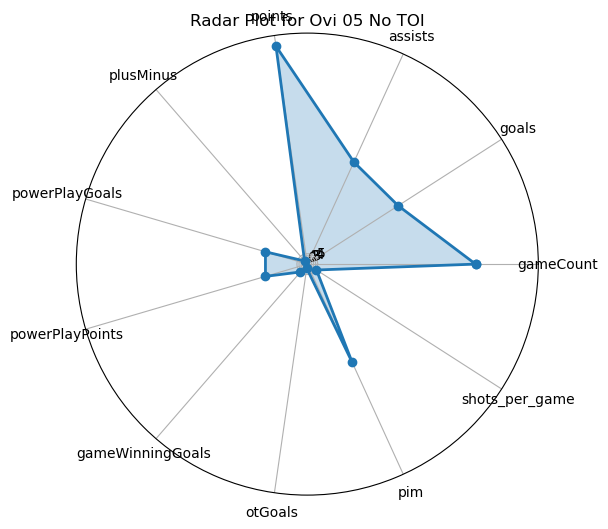

In [394]:
# Create the grouped DataFrame
grouped_df = ovi_05_no_toi

# Labels for the radar chart
labels = grouped_df.columns.tolist()
markers = [0, 1, 2, 3, 4, 5]
str_markers = ["0", "1", "2", "3", "4", "5"]

# Function to create a radar chart
def make_radar_chart(name, stats, attribute_labels=labels, plot_markers=markers, plot_str_markers=str_markers):
    labels = np.array(attribute_labels)
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    
    # The plot is a circle, so we need to "complete the loop"
    stats = np.concatenate((stats, [stats[0]]))
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    plt.yticks(plot_markers)
    ax.set_title(name)
    ax.grid(True)
    
    plt.show()

# Calculate the values for the radar chart
stats = grouped_df.iloc[0].values

# Create a radar chart for the grouped_df DataFrame
make_radar_chart("Radar Plot for Ovi 05 No TOI", stats)